In [31]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from src.features.cleaning import clean_data
from src.utils import get_project_root

In [33]:
dir_root = get_project_root()
dir_data = 'data'
filename_data_brain = os.path.join(
    dir_root,
    dir_data,
    'survival_brain_2000_to_2020_seer_2022_db.csv'
)
data_raw = pd.read_csv(filename_data_brain)

/tmp/ipykernel_20804/838592508.py:8: DtypeWarning: Columns (102) have mixed types. Specify dtype option on import or set low_memory=False.
  data_raw = pd.read_csv(filename_data_brain)


In [34]:
data = clean_data(data_raw)

For an initial look, let's just define a list of some of the  columns that look interesting.

In [35]:
data.head(10)

Age recode with <1 year olds     Sex  Year of diagnosis PRCDA 2020  \
0                             15  Female               2000  Not PRCDA   
2                             15    Male               2000  Not PRCDA   
3                             15    Male               2000  Not PRCDA   
4                             15    Male               2004  Not PRCDA   
5                             15  Female               2001  Not PRCDA   
6                             15    Male               2002  Not PRCDA   
7                             15    Male               2000  Not PRCDA   
8                             15    Male               2001  Not PRCDA   
9                             15    Male               2003  Not PRCDA   
10                            15    Male               2001  Not PRCDA   

   Race recode (W, B, AI, API) Origin recode NHIA (Hispanic, Non-Hisp)  \
0                        White             Non-Spanish-Hispanic-Latino   
2                        White                 Spanish-Hispanic-Latino   
3    Asian or Pacific Islander             Non-Spanish-Hispanic-Latino   
4                        White             Non-Spanish-Hispanic-Latino   
5                        White                 Spanish-Hispanic-Latino   
6                        Black             Non-Spanish-Hispanic-Latino   
7                        White             Non-Spanish-Hispanic-Latino   
8                        White                 Spanish-Hispanic-Latino   
9                        White             Non-Spanish-Hispanic-Latino   
10                       White             Non-Spanish-Hispanic-Latino   

   Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic)  \
0                                  Non-Hispanic White           
2                                Hispanic (All Races)           
3              Non-Hispanic Asian or Pacific Islander           
4                                  Non-Hispanic White           
5                                Hispanic (All Races)           
6                                  Non-Hispanic Black           
7                                  Non-Hispanic White           
8                                Hispanic (All Races)           
9                                  Non-Hispanic White           
10                                 Non-Hispanic White           

   TNM 7/CS v0204+ Schema (thru 2017)  \
0                               Brain   
2                               Brain   
3                               Brain   
4                               Brain   
5                               Brain   
6                               Brain   
7                               Brain   
8                               Brain   
9                               Brain   
10                              Brain   

                      AYA site recode 2020 Revision  \
0                   3.1.2.2 Glioblastoma - invasive   
2                   3.1.2.2 Glioblastoma - invasive   
3             7.3 Germ cell and trophoblastic - CNS   
4                   3.1.2.2 Glioblastoma - invasive   
5              3.1.1.2 Oligodendroglioma - invasive   
6                     3.1.4.1 Pilocytic astrocytoma   
7              3.1.1.2 Oligodendroglioma - invasive   
8             7.3 Germ cell and trophoblastic - CNS   
9                   3.1.2.2 Glioblastoma - invasive   
10  3.1.4.3 Other astrocytoma/astroglial - invasive   

              ICCC site recode 3rd edition/IARC 2017  ...  \
0                                  IIIb Astrocytomas  ...   
2                                  IIIb Astrocytomas  ...   
3   Xa Intracranial and intraspinal germ cell tumors  ...   
4                                  IIIb Astrocytomas  ...   
5                                 IIId Other gliomas  ...   
6                                  IIIb Astrocytomas  ...   
7                                 IIId Other gliomas  ...   
8   Xa Intracranial and intraspinal germ cell tumors  ...   
9                                  IIIb Astrocytoma

In [36]:
categorical_columns = [
    'Sex',
    'Race recode (W, B, AI, API)', 
    'Origin recode NHIA (Hispanic, Non-Hisp)', 
    'Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic)', 
    'Vital status recode (study cutoff used)', 
    'SEER cause-specific death classification', 
    'SEER other cause of death classification', 
    'Type of Reporting Source', 
    'Marital status at diagnosis', 
    'Rural-Urban Continuum Code', 
    'End Calc Vital Status (Adjusted)', 
]
numerical_columns = [
    'Year of diagnosis', 
    'Year of follow-up recode', 
    'Total number of in situ/malignant tumors for patient', 
    'Year of diagnosis (2000-2019 by 5)', 
    'Survival months'
]
other_useful_columns = [
    'Alive at last contact', 
    'Year of death recode', 
    'Age recode with <1 year olds', 
    'Median household income inflation adj to 2021 (thousands USD)'
]
all_useful_columns = categorical_columns + numerical_columns + other_useful_columns
data = data.astype({col: 'category' for col in categorical_columns})

In [37]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(
    data, 
    test_size=0.2, 
    random_state=2984, 
    shuffle=True, 
    stratify=data['Vital status recode (study cutoff used)']
)

# Make a smaller dataframe for testing
d = data_train[all_useful_columns]

In [38]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61140 entries, 57582 to 62886
Data columns (total 20 columns):
 #   Column                                                         Non-Null Count  Dtype   
---  ------                                                         --------------  -----   
 0   Sex                                                            61140 non-null  category
 1   Race recode (W, B, AI, API)                                    61140 non-null  category
 2   Origin recode NHIA (Hispanic, Non-Hisp)                        61140 non-null  category
 3   Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic)     61140 non-null  category
 4   Vital status recode (study cutoff used)                        61140 non-null  category
 5   SEER cause-specific death classification                       61140 non-null  category
 6   SEER other cause of death classification                       61140 non-null  category
 7   Type of Reporting Source                          

## Exploratory Data Analysis

In [39]:
d.head(10)

Sex Race recode (W, B, AI, API)  \
57582    Male                       White   
65377  Female                       White   
39073  Female   Asian or Pacific Islander   
1120   Female                       White   
70807    Male                       White   
26915    Male                       White   
70078  Female                       White   
44849    Male                       White   
47942  Female                       White   
50226    Male                       White   

      Origin recode NHIA (Hispanic, Non-Hisp)  \
57582             Non-Spanish-Hispanic-Latino   
65377             Non-Spanish-Hispanic-Latino   
39073             Non-Spanish-Hispanic-Latino   
1120                  Spanish-Hispanic-Latino   
70807             Non-Spanish-Hispanic-Latino   
26915             Non-Spanish-Hispanic-Latino   
70078             Non-Spanish-Hispanic-Latino   
44849             Non-Spanish-Hispanic-Latino   
47942             Non-Spanish-Hispanic-Latino   
50226             Non-Spanish-Hispanic-Latino   

      Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic)  \
57582                                 Non-Hispanic White           
65377                                 Non-Hispanic White           
39073             Non-Hispanic Asian or Pacific Islander           
1120                                Hispanic (All Races)           
70807                                 Non-Hispanic White           
26915                                 Non-Hispanic White           
70078                                 Non-Hispanic White           
44849                                 Non-Hispanic White           
47942                                 Non-Hispanic White           
50226                                 Non-Hispanic White           

      Vital status recode (study cutoff used)  \
57582                                    Dead   
65377                                    Dead   
39073                                    Dead   
1120                                    Alive   
70807                                    Dead   
26915                                    Dead   
70078                                    Dead   
44849                                    Dead   
47942                                    Dead   
50226                                    Dead   

      SEER cause-specific death classification  \
57582    Dead (attributable to this cancer dx)   
65377    Dead (attributable to this cancer dx)   
39073    Dead (attributable to this cancer dx)   
1120              Alive or dead of other cause   
70807    Dead (attributable to this cancer dx)   
26915    Dead (attributable to this cancer dx)   
70078    Dead (attributable to this cancer dx)   
44849    Dead (attributable to this cancer dx)   
47942             Alive or dead of other cause   
50226    Dead (attributable to this cancer dx)   

                SEER other cause of death classification  \
57582                        Alive or dead due to cancer   
65377                        Alive or dead due to cancer   
39073                        Alive or dead due to cancer   
1120                         Alive or dead due to cancer   
70807                        Alive or dead due to cancer   
26915                        Alive or dead due to cancer   
70078                        Alive or dead due to cancer   
44849                        Alive or dead due to cancer   
47942  Dead (attributable to causes other than this c...   
50226                        Alive or dead due to cancer   

                      Type of Reporting Source  \
57582  Hospital inpatient/outpatient or clinic   
65377  Hospital inpatient/outpatient or clinic   
39073  Hospital inpatient/outpatient or clinic   
1120   Hospital inpatient/outpatient or clinic   
70807  Hospital inpatient/outpatient or clinic   
26915  Hospital inpatient/outpatient or clinic   
70078  Hospital inpatient/outpatient or clinic   
44849  Hospital inpatient/outpatient or clinic   
47942  Hospital inpatie

### Data Visualization

We want to get a rough idea of the distributions within the data. This initial look should be fairly cursory, since we haven't even done the train-test split yet.

Below are several quick summary plots of some of the most important features. (There are a few formatting issues.)

In [40]:
import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels)

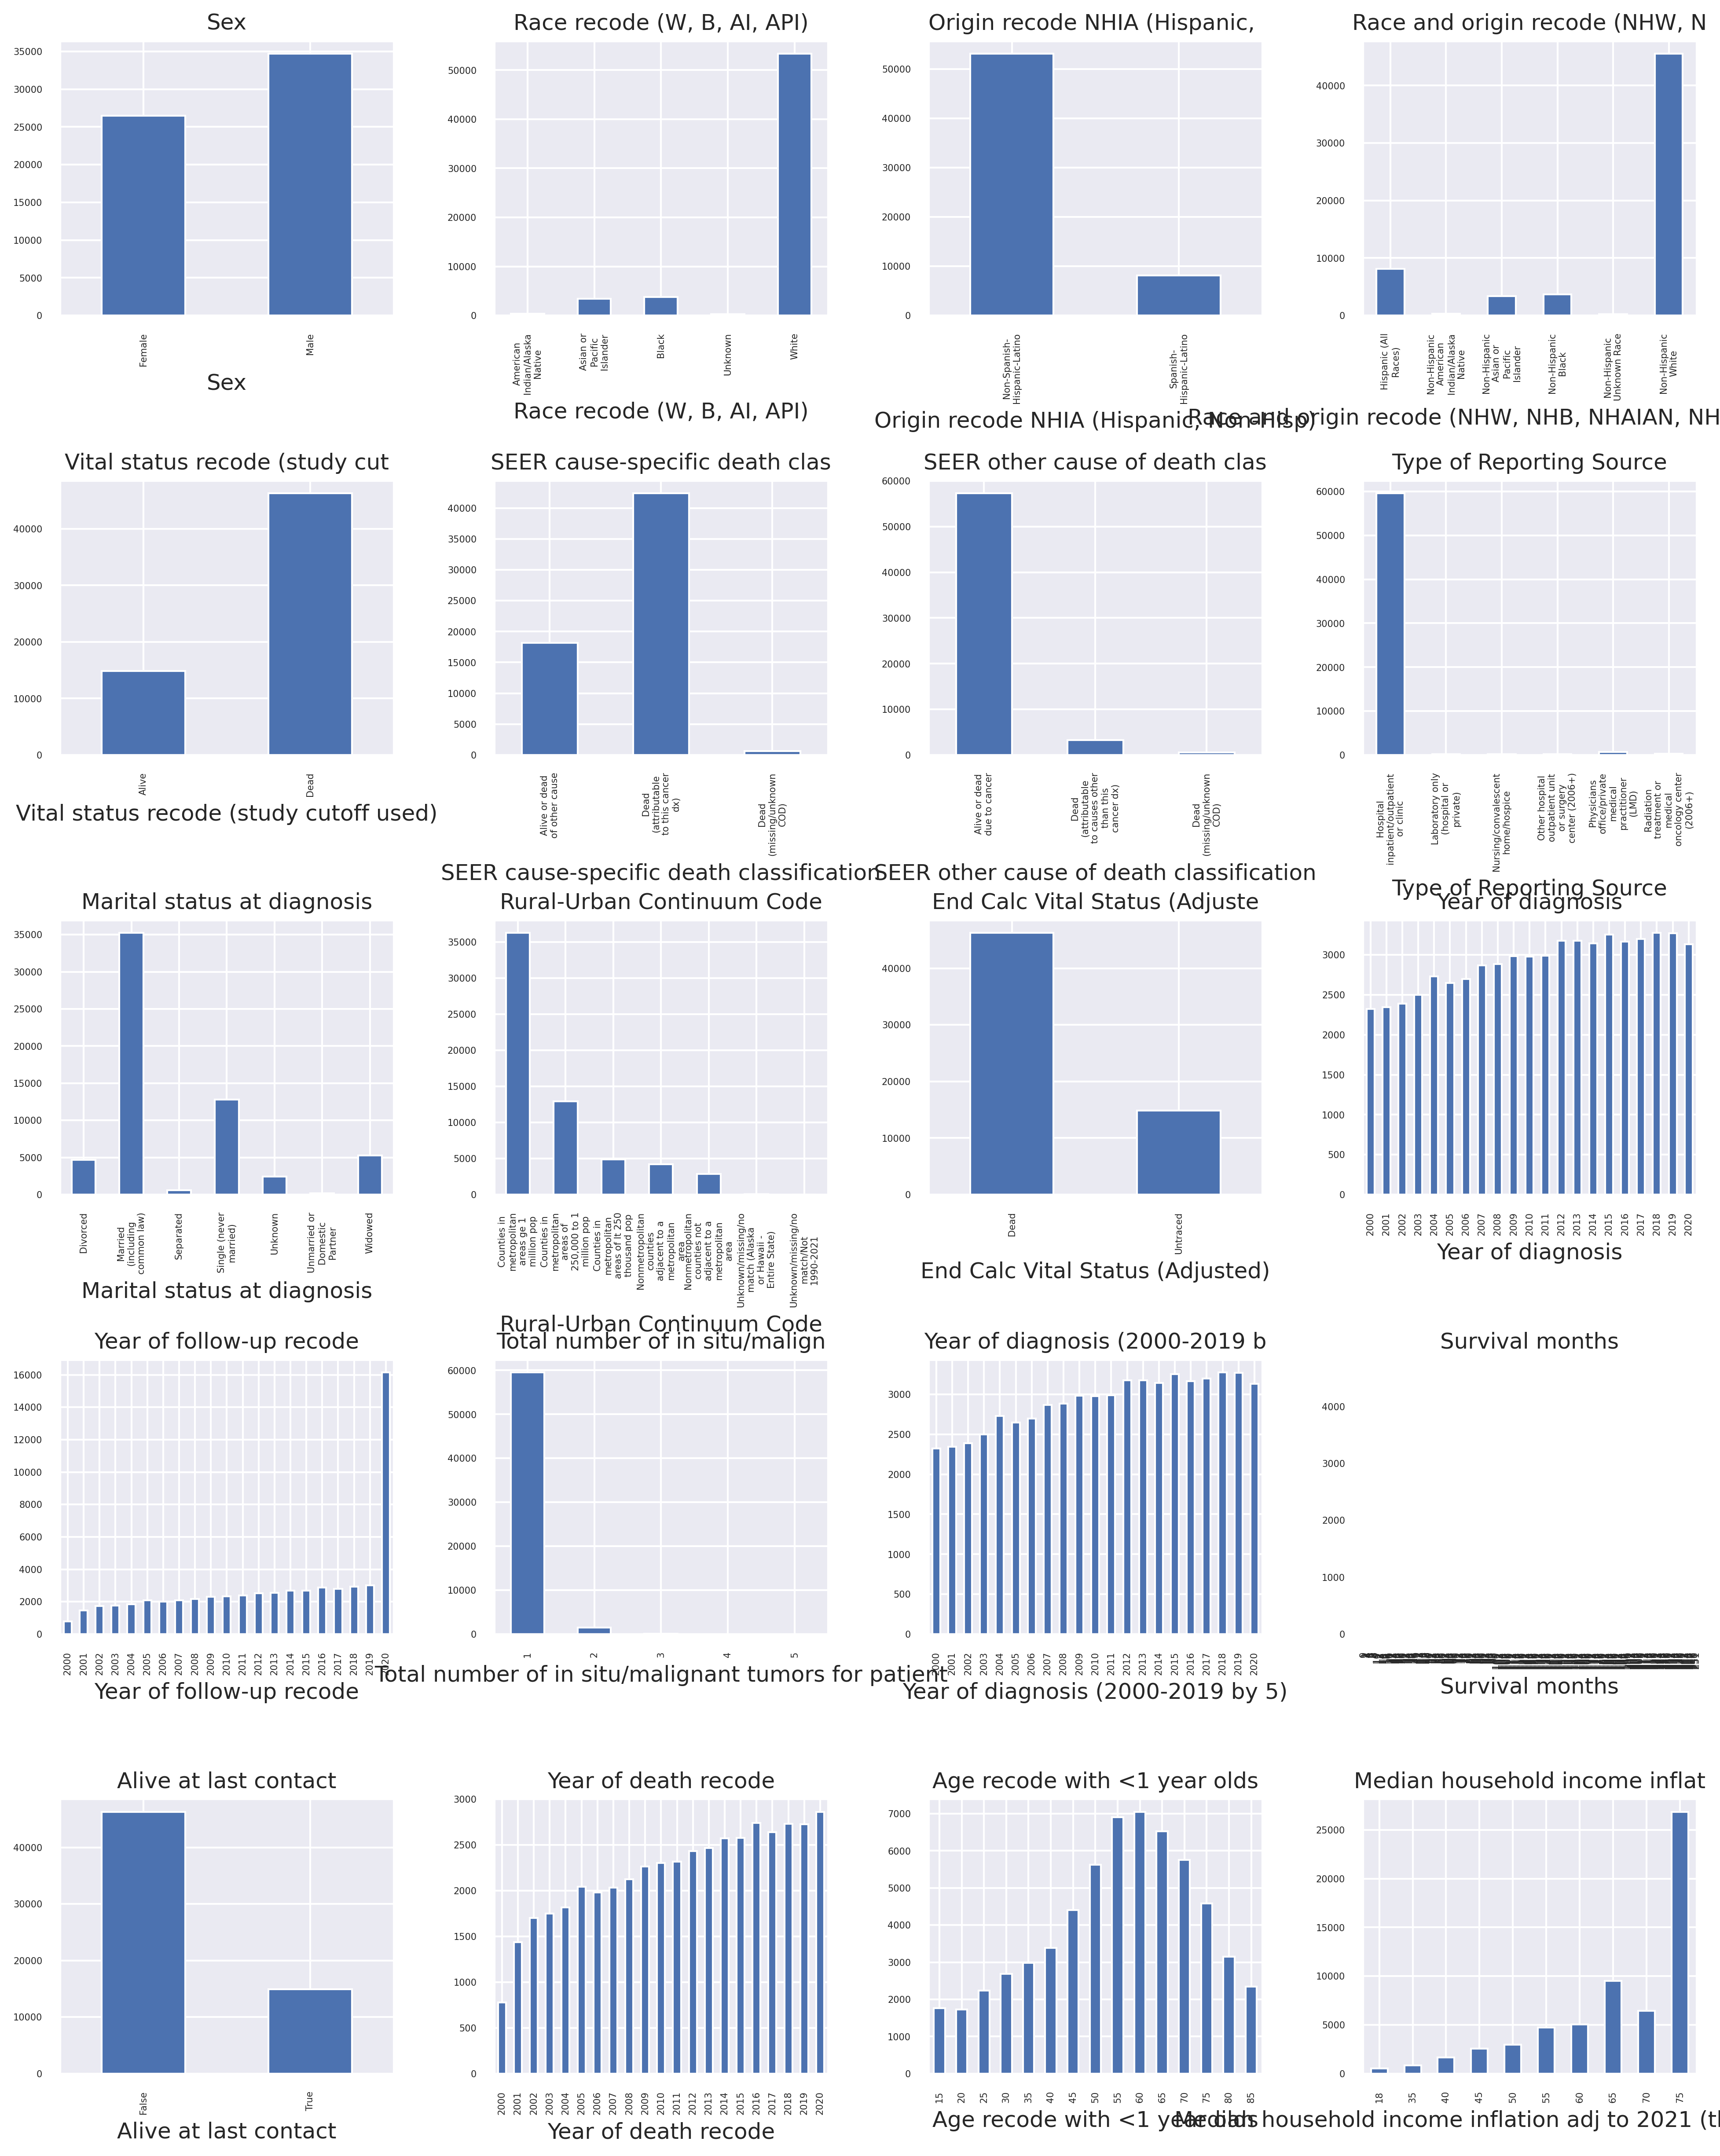

In [41]:
fig, axes = plt.subplots(5, 4, figsize=(16,20), dpi=300)
for col, ax in zip(d, axes.ravel()):
    d[col].value_counts().sort_index().plot.bar(ax=ax, title=col[:30])
    wrap_labels(ax, 15)
    ax.tick_params(axis='both', which='major', labelsize=5)
fig.subplots_adjust(wspace=0.3, hspace=0.6)

In [42]:
import seaborn as sns
sns.set_theme(rc={"figure.dpi": 100})

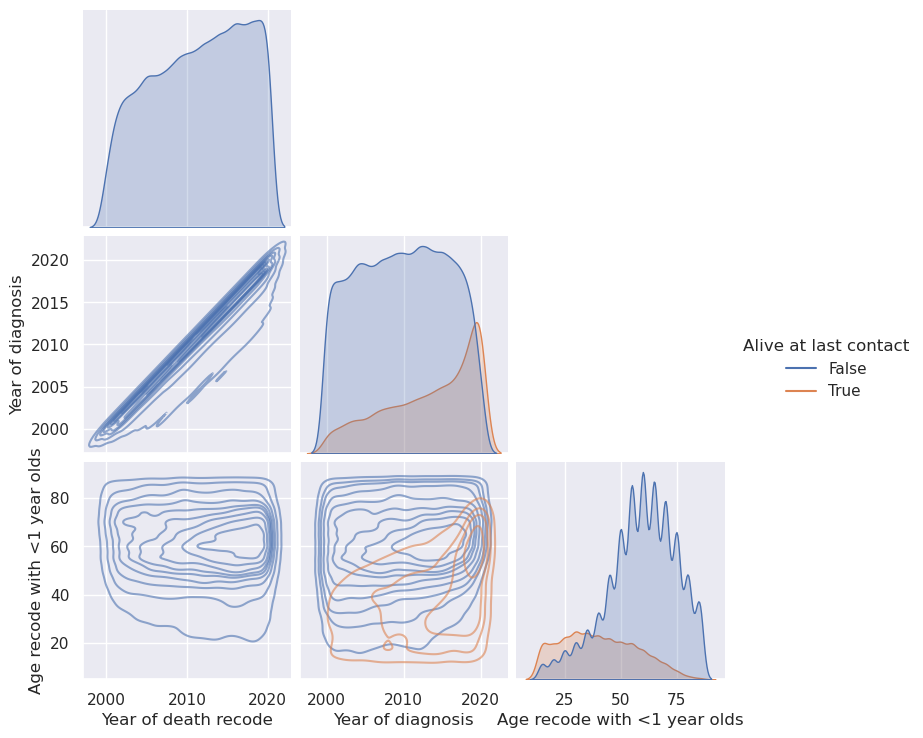

In [43]:
c = [
    'Year of death recode', 
    'Year of diagnosis', 
    'Age recode with <1 year olds', 
    # 'Sex', 
    # 'Race recode (W, B, AI, API)', 
    # 'Total number of in situ/malignant tumors for patient', 
    # # 'Alive at last contact', 
    # 'Median household income inflation adj to 2021 (thousands USD)'
]
sns.pairplot(
    data=d,
    x_vars=c,
    y_vars=c,
    hue='Alive at last contact',
    plot_kws={'alpha': 0.6},
    kind='kde',
    corner=True
)

(Note that the KDE in the distribution plot is smoothing over the age ranges.)

array([[<Axes: title={'center': 'Age recode with <1 year olds'}>]],
      dtype=object)

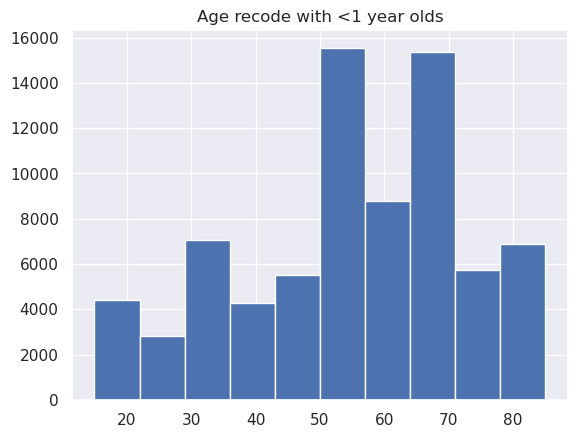

In [44]:
data.hist(['Age recode with <1 year olds'])

<Axes: xlabel='Age recode with <1 year olds', ylabel='Survival months'>

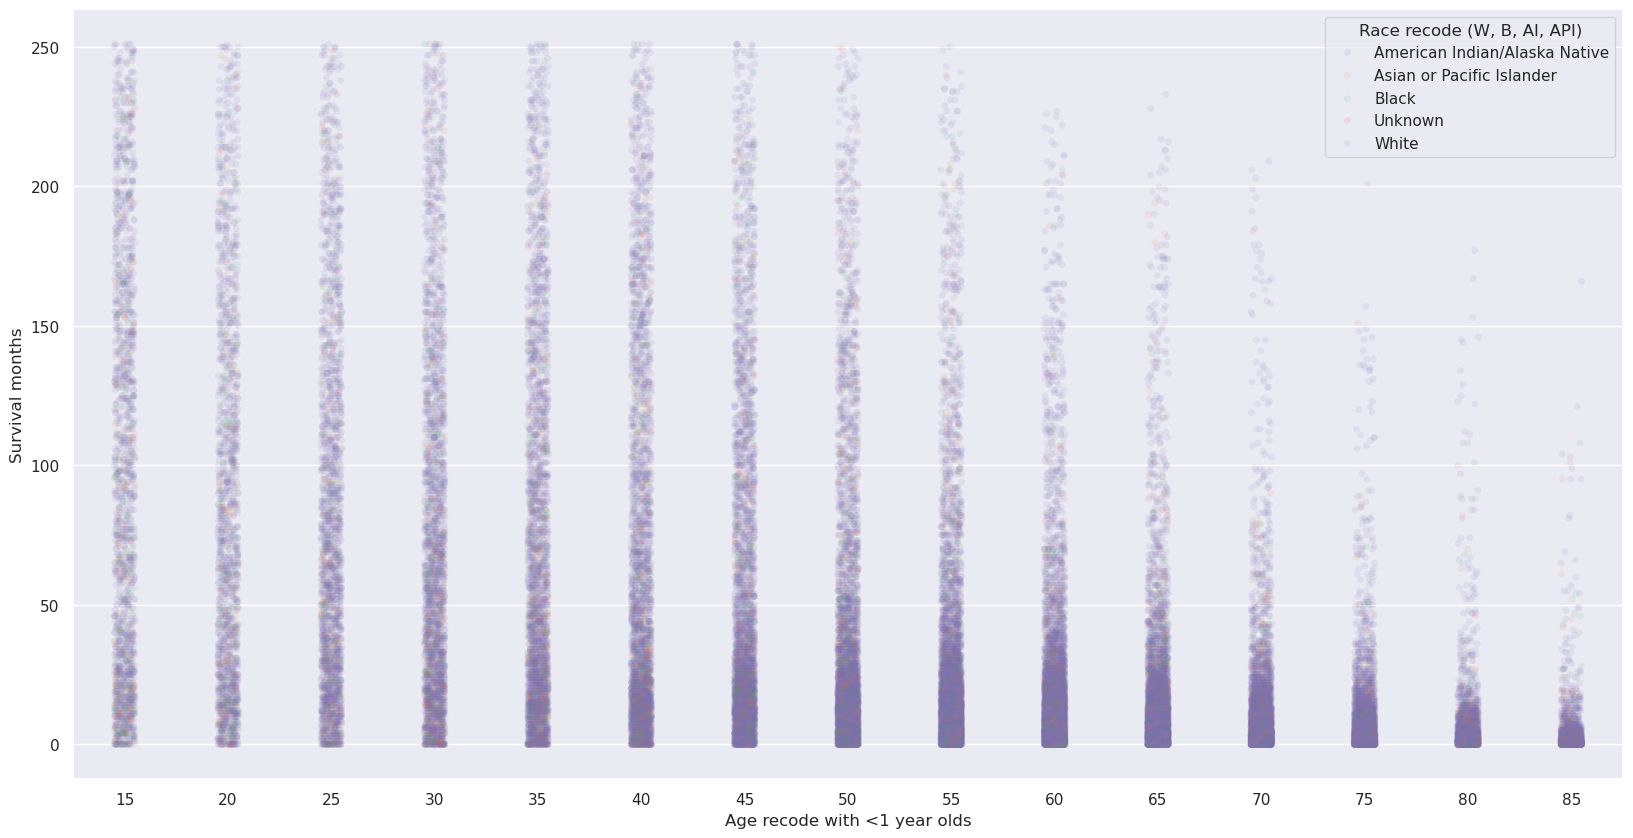

In [45]:
fig, ax = plt.subplots(figsize=(20,10))
sns.stripplot(
    ax=ax,
    data=d,
    x='Age recode with <1 year olds',
    y='Survival months',
    hue='Race recode (W, B, AI, API)',
    alpha=0.1
)

Since we can't see a whole lot here, let's make a plot for each age range.

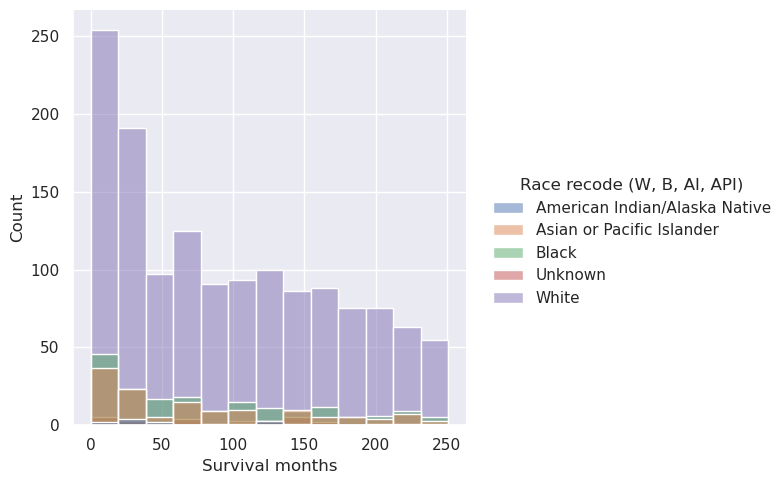

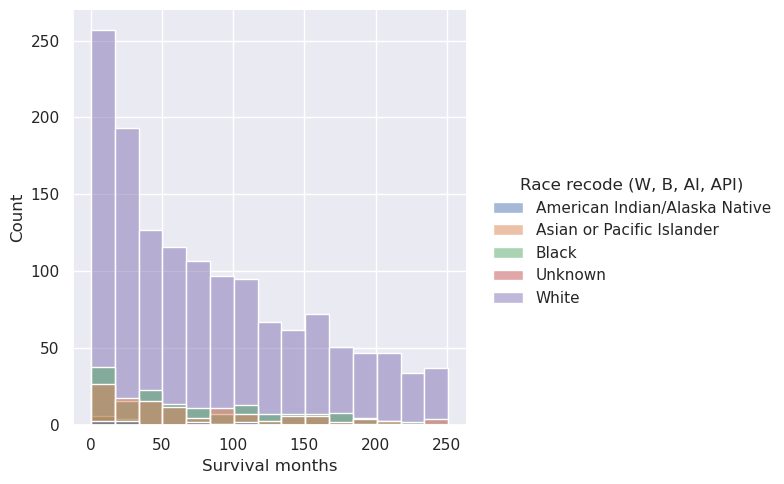

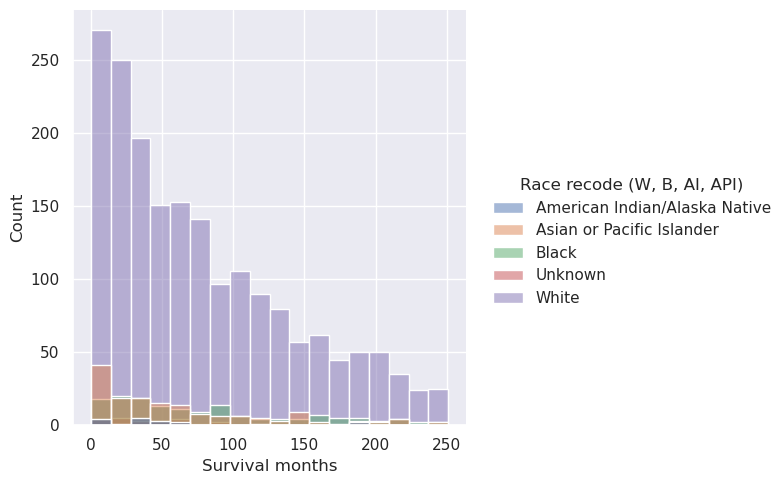

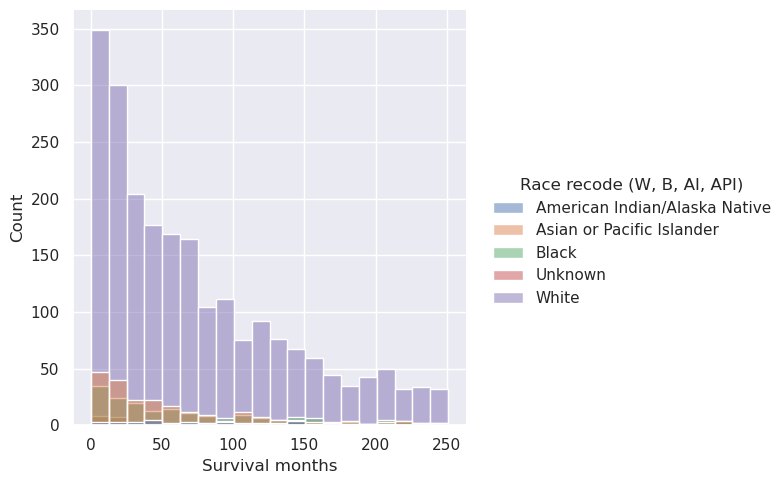

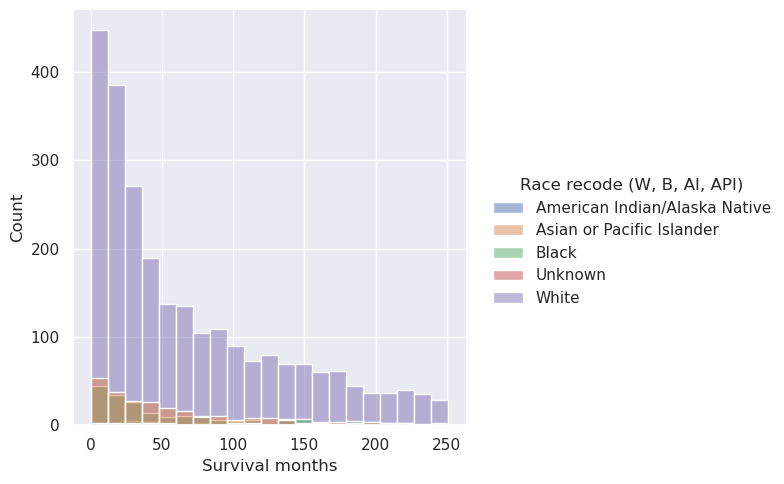

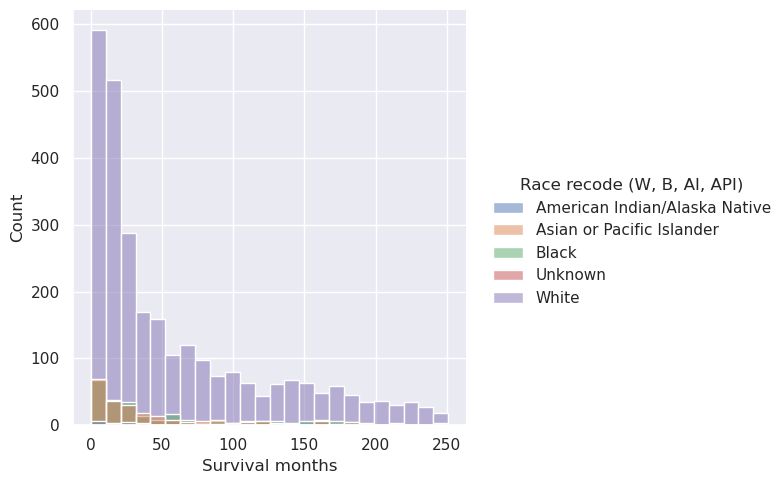

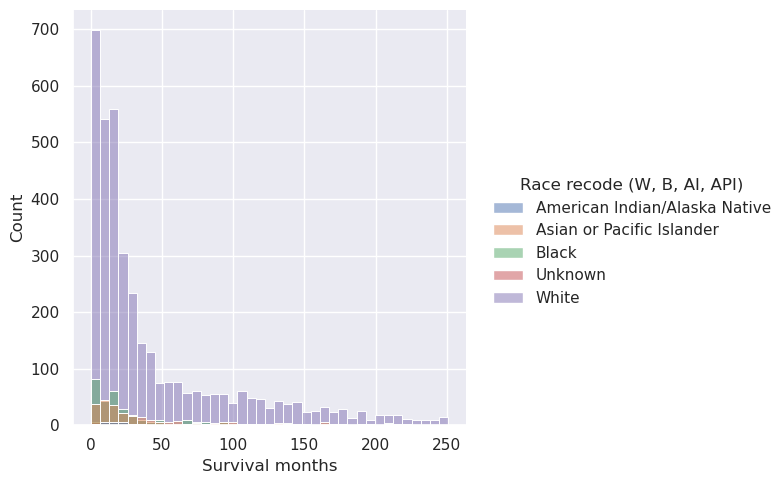

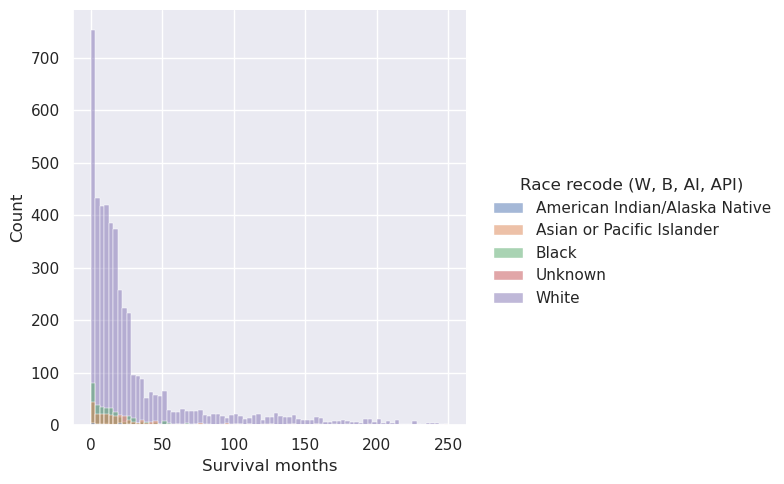

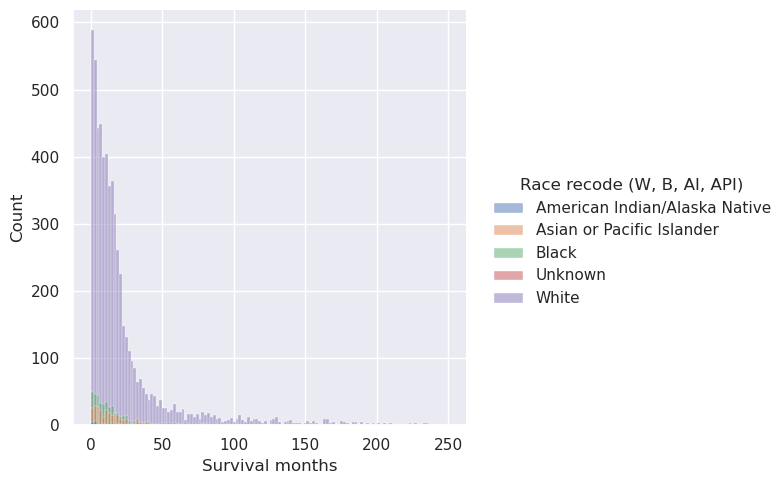

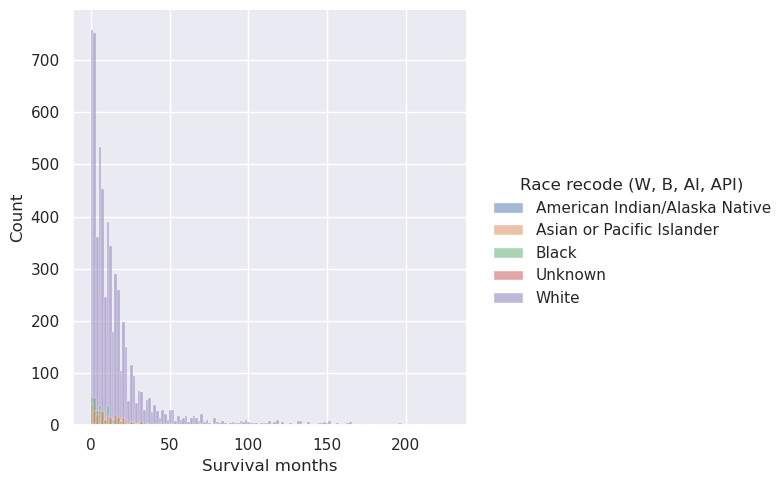

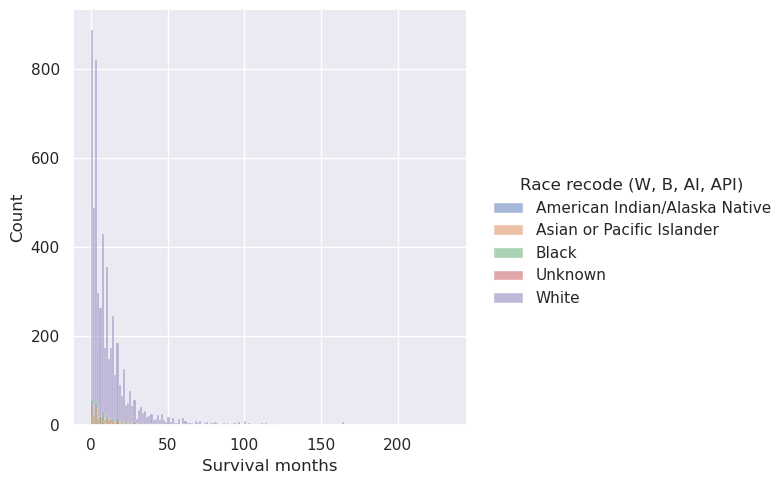

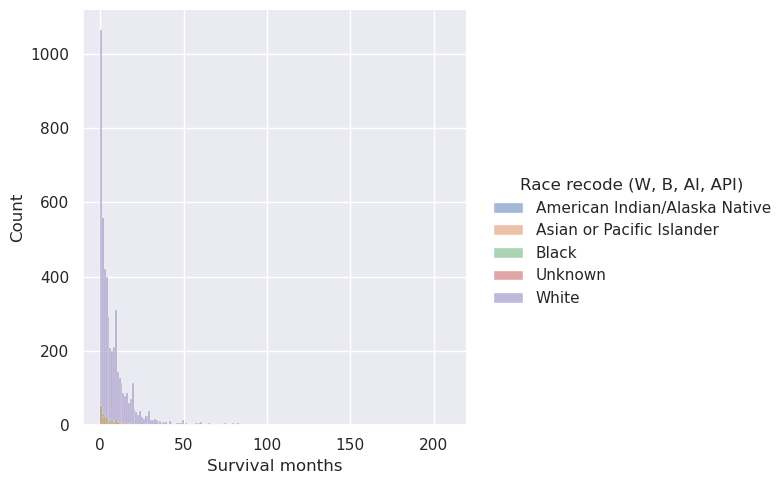

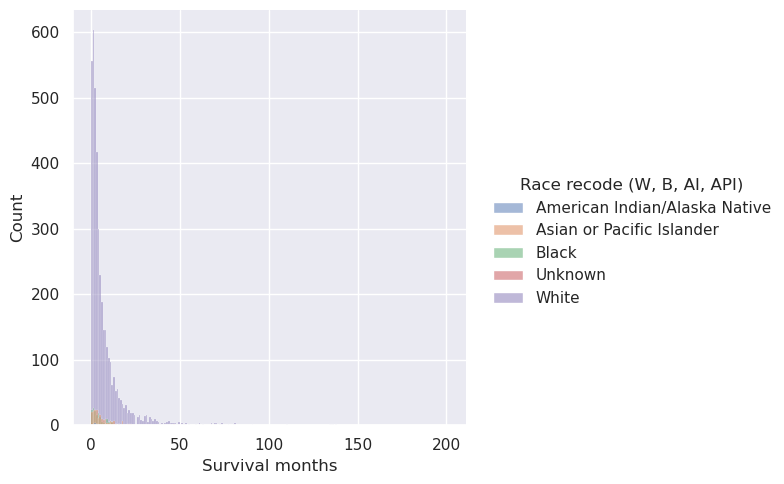

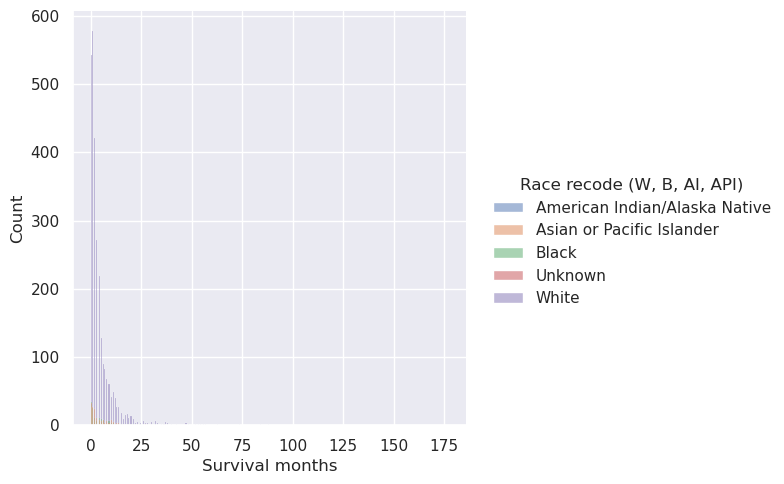

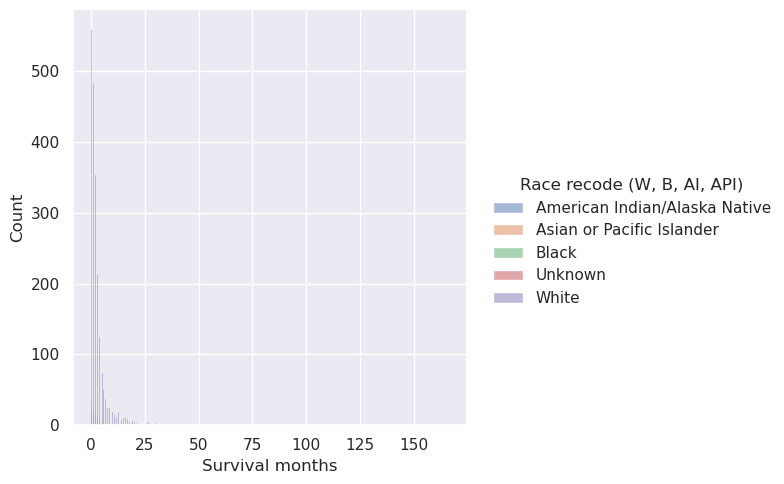

In [46]:
for age in sorted(d['Age recode with <1 year olds'].unique()):
    dd = d[d['Age recode with <1 year olds'] == age]
    sns.displot(data=dd, x='Survival months', hue='Race recode (W, B, AI, API)', kind='hist')

<Axes: xlabel='Year of diagnosis', ylabel='Survival months'>

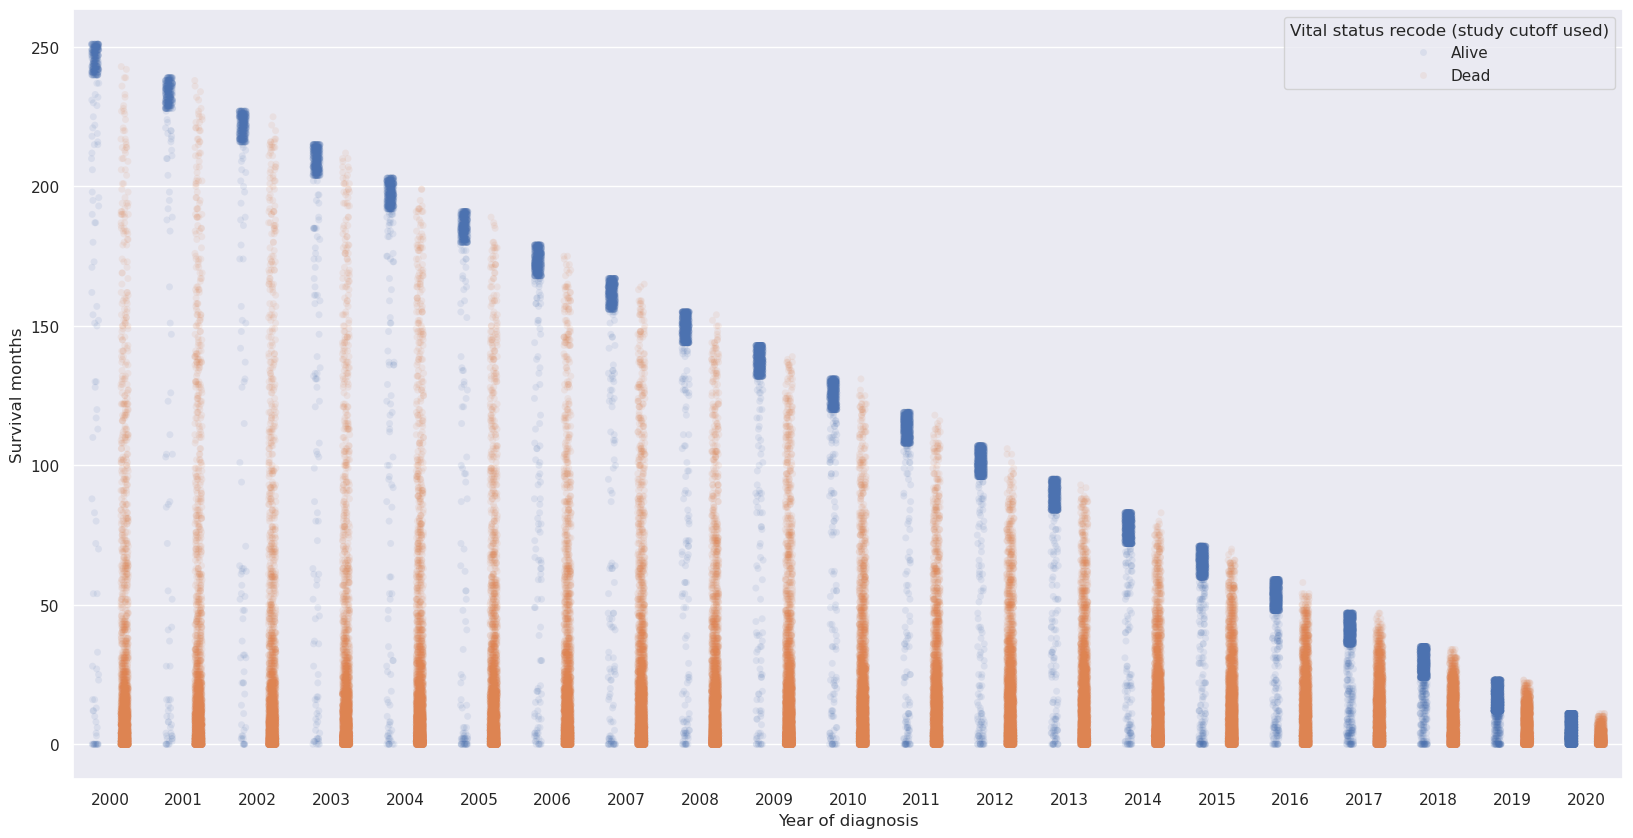

In [47]:
fig, ax = plt.subplots(figsize=(20,10))
sns.stripplot(
    ax=ax,
    data=data,
    x='Year of diagnosis',
    y='Survival months',
    hue='Vital status recode (study cutoff used)',
    dodge=True,
    alpha=0.1
)

<Axes: xlabel='Vital status recode (study cutoff used)', ylabel='count'>

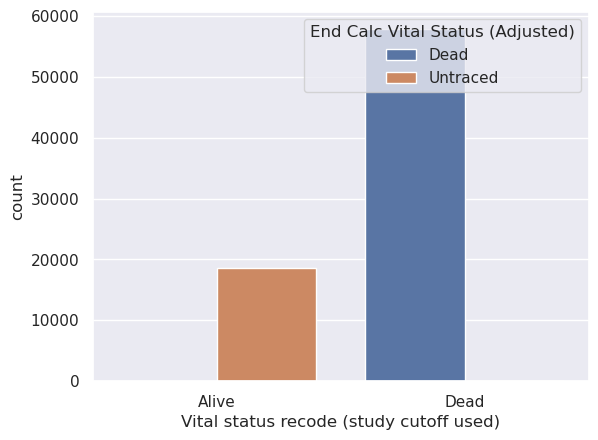

In [48]:
fig, ax = plt.subplots()
sns.countplot(
    ax=ax,
    data=data,
    x='Vital status recode (study cutoff used)',
    hue='End Calc Vital Status (Adjusted)'
)

<Axes: xlabel='Year of diagnosis', ylabel='Survival months'>

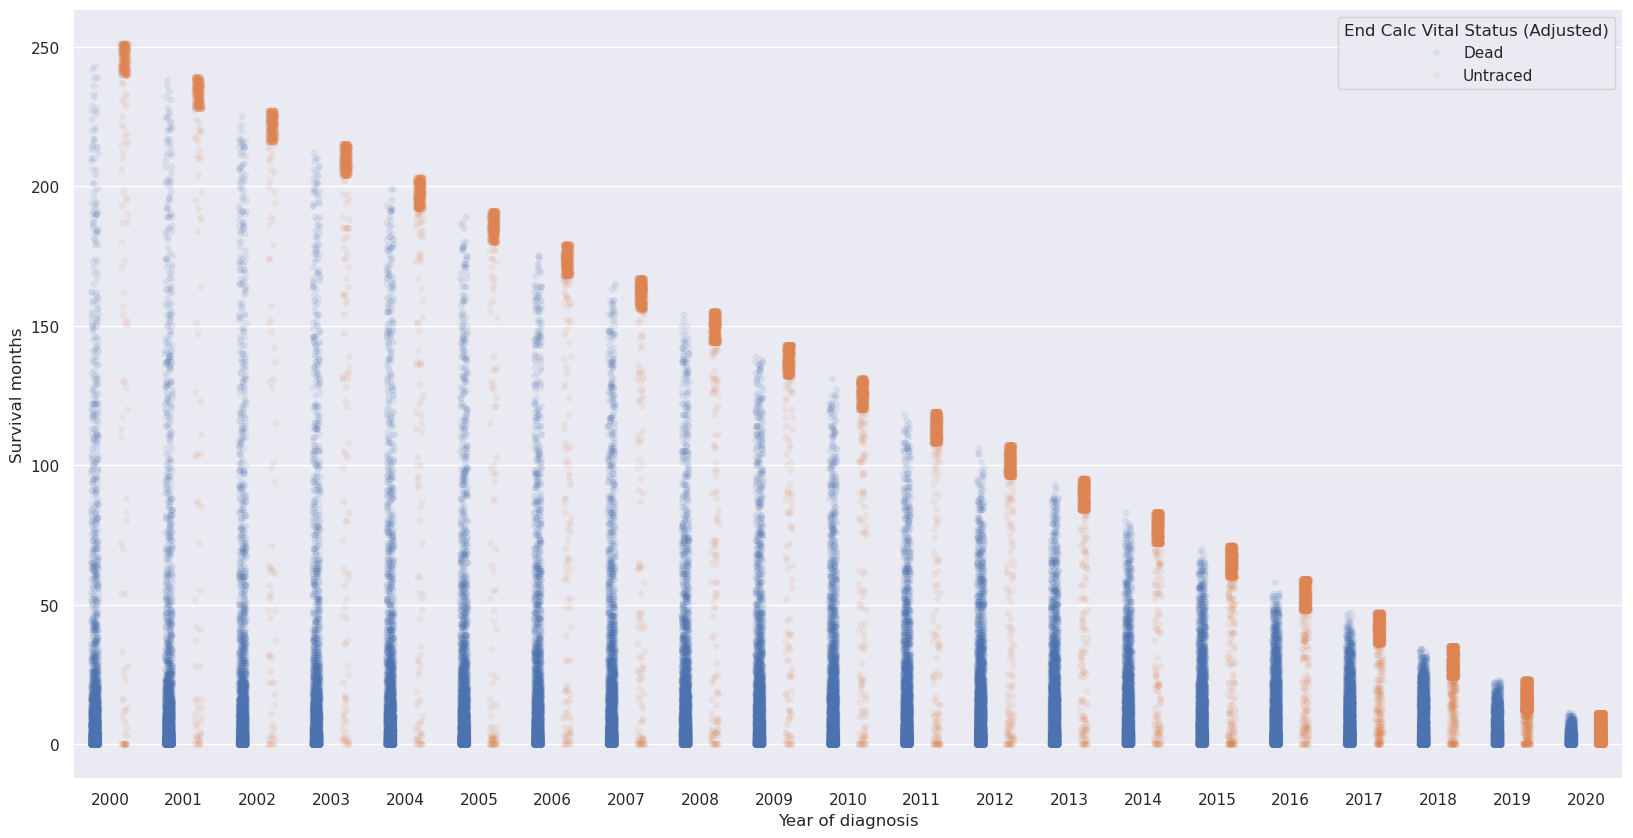

In [49]:
fig, ax = plt.subplots(figsize=(20,10))
sns.stripplot(
    ax=ax,
    data=data,
    x='Year of diagnosis',
    y='Survival months',
    hue='End Calc Vital Status (Adjusted)',
    dodge=True,
    alpha=0.1
)

In [50]:
data['Survival months flag'].value_counts()

Survival months flag
Complete dates are available and there are more than 0 days of survival    76425
Name: count, dtype: int64

/tmp/ipykernel_20804/580358642.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


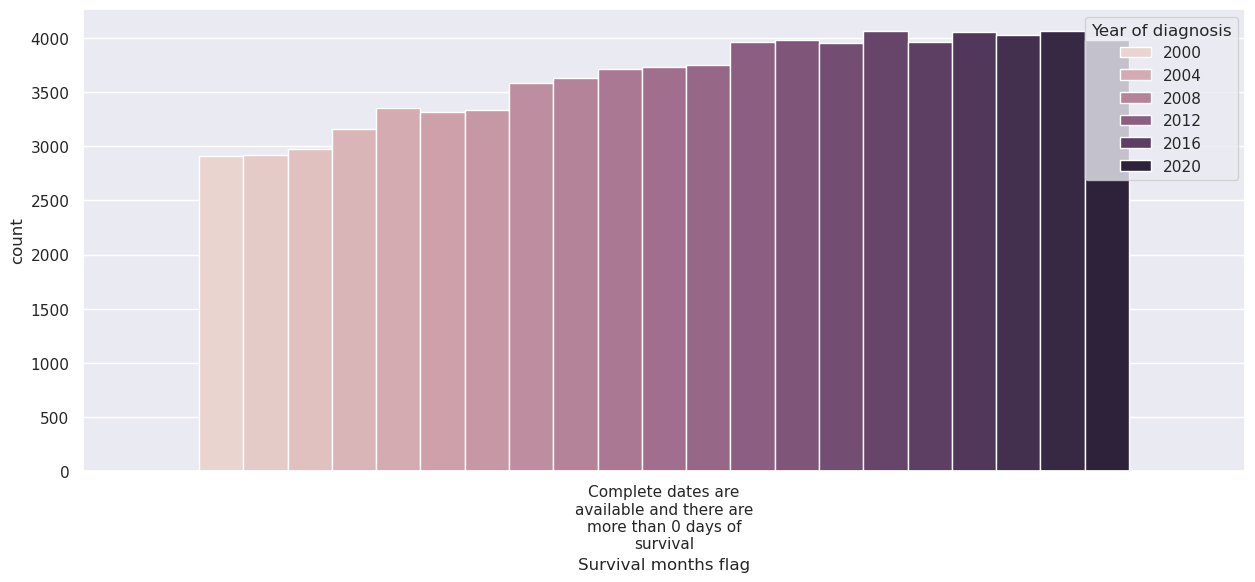

In [51]:
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(
    ax=ax,
    data=data,
    x='Survival months flag',
    hue='Year of diagnosis'
)
wrap_labels(ax, 25)

/tmp/ipykernel_20804/580358642.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)
/tmp/ipykernel_20804/580358642.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)
/tmp/ipykernel_20804/580358642.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)
/tmp/ipykernel_20804/580358642.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)
/tmp/ipykernel_20804/580358642.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)
/tmp/ipykernel_20804/580358642

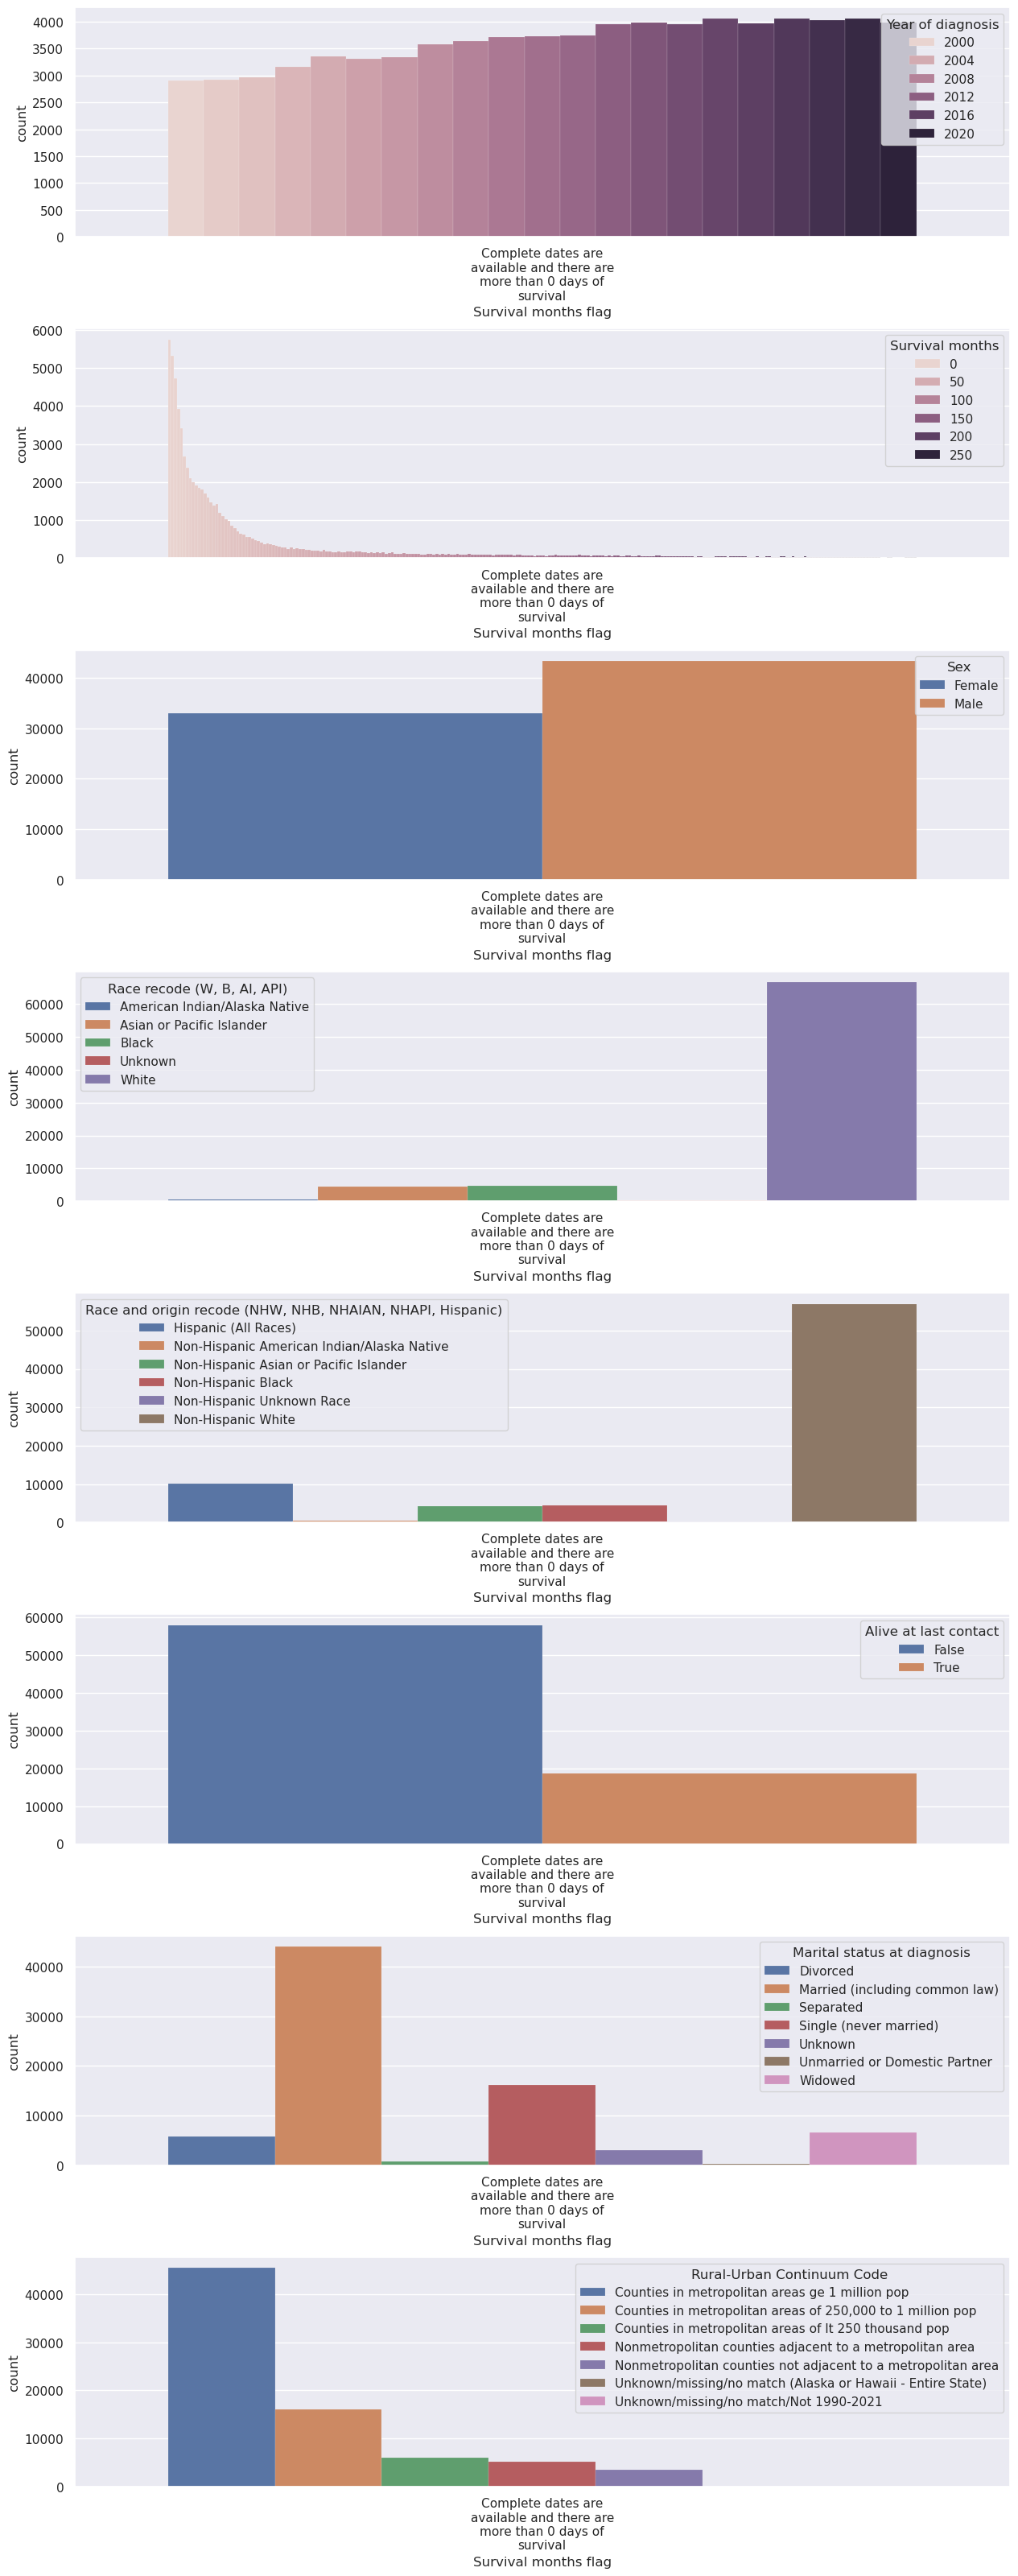

In [52]:
cols_to_plot = [
    'Year of diagnosis', 
    'Survival months', 
    'Sex', 
    'Race recode (W, B, AI, API)', 
    'Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic)',
    'Alive at last contact',
    'Marital status at diagnosis',
    'Rural-Urban Continuum Code',
]
fig, axarr = plt.subplots(len(cols_to_plot), 1, figsize=(15,5*len(cols_to_plot)))

for ax,col in zip(axarr, cols_to_plot):
    sns.countplot(
        ax=ax,
        data=data,
        x='Survival months flag',
        hue=col,
        linewidth=0.1
    )
    wrap_labels(ax, 25)
fig.subplots_adjust(hspace=0.4)